<a href="https://colab.research.google.com/github/mojtabaSefidi/Dataminig-small-projects/blob/main/FrequentPatternMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install mlxtend --upgrade
%pip install pyECLAT --upgrade
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from pyECLAT import ECLAT
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
import time
sn.set()

In [3]:
!wget http://fimi.uantwerpen.be/data/mushroom.dat

--2021-12-06 09:56:21--  http://fimi.uantwerpen.be/data/mushroom.dat
Resolving fimi.uantwerpen.be (fimi.uantwerpen.be)... 143.129.69.1
Connecting to fimi.uantwerpen.be (fimi.uantwerpen.be)|143.129.69.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 570408 (557K)
Saving to: ‘mushroom.dat’

mushroom.dat        100%[===================>] 557.04K   809KB/s    in 0.7s    

2021-12-06 09:56:22 (809 KB/s) - ‘mushroom.dat’ saved [570408/570408]



In [25]:
data = pd.read_csv('mushroom.dat',sep=' ',header = None).iloc[: , :-1]
data_array = data.to_numpy()
data_array

array([[  1,   3,   9, ...,  98, 107, 113],
       [  2,   3,   9, ...,  99, 108, 114],
       [  2,   4,   9, ...,  99, 108, 115],
       ...,
       [  2,   6,   9, ..., 106, 112, 119],
       [  1,   7,  10, ..., 102, 110, 119],
       [  2,   3,   9, ..., 104, 112, 119]])

In [26]:
te = TransactionEncoder()
encoded_data = te.fit(data_array).transform(data_array)
print(encoded_data.shape)
encoded_data

(8124, 119)


array([[ True, False,  True, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False,  True, False, ..., False, False,  True],
       [ True, False, False, ..., False, False,  True],
       [False,  True,  True, ..., False, False,  True]])

In [27]:
number_of_product = np.unique(data_array.ravel())
column_name = np.array(list(map(lambda x : 'item ' + str(x) , number_of_product)))
dataset = pd.DataFrame(data=encoded_data , columns= column_name)
dataset.head(2).T

,0,1
item 1,True,False
item 2,False,True
item 3,True,True
item 4,False,False
item 5,False,False
...,...,...
item 115,False,False
item 116,False,False
item 117,False,False
item 118,False,False


In [28]:
occurance = []
for name in dataset.columns :
      occurance.append(dataset[name].sum())
print(sorted(occurance)[-20:])

[3516, 3528, 3656, 3776, 3916, 3968, 4040, 4208, 4384, 4464, 4608, 4748, 4936, 5176, 5612, 6812, 7488, 7914, 7924, 8124]


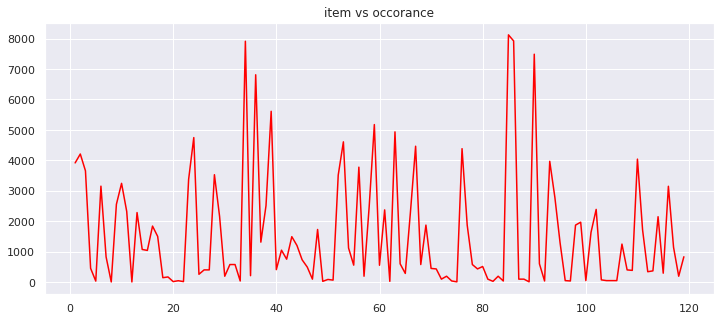

In [37]:
x = list(range(1, 120))
plt.figure(figsize=(12,5))
plt.title('item vs occorance')
sn.lineplot(x=x , y=occurance , color='Red')

In [7]:
frequent_itemsets = apriori(dataset, min_support=0.70, use_colnames=True)
frequent_itemsets.head(15)

,support,itemsets
0,0.974151,(item 34)
1,0.838503,(item 36)
2,1.000000,(item 85)
3,0.975382,(item 86)
4,0.921713,(item 90)
5,0.812654,"(item 34, item 36)"
6,0.974151,"(item 85, item 34)"
7,0.973166,"(item 86, item 34)"
8,0.898080,"(item 90, item 34)"
9,0.838503,"(item 85, item 36)"


In [8]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.98).sort_values(by=['lift'], ascending=False).head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,"(item 86, item 90, item 36)",(item 34),0.772033,0.974151,0.772033,1.000000,1.026535,0.019957,inf
37,"(item 86, item 90, item 36)","(item 85, item 34)",0.772033,0.974151,0.772033,1.000000,1.026535,0.019957,inf
29,"(item 86, item 90, item 85)",(item 34),0.897095,0.974151,0.897095,1.000000,1.026535,0.023189,inf
34,"(item 86, item 85, item 90, item 36)",(item 34),0.772033,0.974151,0.772033,1.000000,1.026535,0.019957,inf
31,"(item 86, item 90)","(item 85, item 34)",0.897095,0.974151,0.897095,1.000000,1.026535,0.023189,inf
15,"(item 86, item 90)",(item 34),0.897095,0.974151,0.897095,1.000000,1.026535,0.023189,inf
27,"(item 90, item 34, item 36)",(item 86),0.772033,0.975382,0.772033,1.000000,1.025240,0.019006,inf
24,"(item 34, item 36)","(item 86, item 85)",0.812654,0.975382,0.812654,1.000000,1.025240,0.020006,inf
22,"(item 85, item 34, item 36)",(item 86),0.812654,0.975382,0.812654,1.000000,1.025240,0.020006,inf
38,"(item 90, item 34, item 36)","(item 86, item 85)",0.772033,0.975382,0.772033,1.000000,1.025240,0.019006,inf


In [9]:
frequent_itemsets = fpgrowth(dataset, min_support=0.70, use_colnames=True)
frequent_itemsets.tail(15)

,support,itemsets
16,0.838503,"(item 85, item 36)"
17,0.814870,"(item 86, item 36)"
18,0.812654,"(item 34, item 36)"
19,0.795667,"(item 90, item 36)"
20,0.814870,"(item 86, item 85, item 36)"
21,0.812654,"(item 86, item 34, item 36)"
22,0.812654,"(item 85, item 34, item 36)"
23,0.812654,"(item 86, item 85, item 34, item 36)"
24,0.795667,"(item 90, item 36, item 85)"
25,0.772033,"(item 90, item 34, item 36)"


In [10]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.98).sort_values(by=['lift']).head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(item 86),(item 85),0.975382,1.0,0.975382,1.0,1.0,0.0,inf
36,"(item 86, item 90, item 34, item 36)",(item 85),0.772033,1.0,0.772033,1.0,1.0,0.0,inf
31,"(item 86, item 90, item 36)",(item 85),0.772033,1.0,0.772033,1.0,1.0,0.0,inf
30,"(item 90, item 34, item 36)",(item 85),0.772033,1.0,0.772033,1.0,1.0,0.0,inf
29,"(item 90, item 36)",(item 85),0.795667,1.0,0.795667,1.0,1.0,0.0,inf
25,"(item 86, item 34, item 36)",(item 85),0.812654,1.0,0.812654,1.0,1.0,0.0,inf
23,"(item 34, item 36)",(item 85),0.812654,1.0,0.812654,1.0,1.0,0.0,inf
20,"(item 86, item 36)",(item 85),0.814870,1.0,0.814870,1.0,1.0,0.0,inf
14,"(item 86, item 90, item 34)",(item 85),0.897095,1.0,0.897095,1.0,1.0,0.0,inf
11,"(item 86, item 90)",(item 85),0.897095,1.0,0.897095,1.0,1.0,0.0,inf


In [12]:
for name in data.columns :
      data[name] = 'item ' + data[name].astype(str)
eclat_class = ECLAT(data=data,verbose=True)
eclat_class.df_bin


100%|██████████| 119/119 [00:00<00:00, 1473.30it/s]


,item 26,item 116,item 107,item 115,item 94,item 111,item 28,item 119,item 54,item 102,item 39,item 71,item 23,item 55,item 93,item 36,item 98,item 64,item 22,item 43,item 112,item 11,item 80,item 96,item 50,item 104,item 35,item 41,item 48,item 3,item 29,item 75,item 91,item 63,item 60,item 53,item 99,item 106,item 105,item 2,...,item 79,item 45,item 114,item 27,item 5,item 37,item 13,item 113,item 19,item 95,item 34,item 61,item 109,item 33,item 21,item 46,item 14,item 15,item 83,item 77,item 56,item 78,item 52,item 10,item 68,item 57,item 84,item 24,item 7,item 87,item 92,item 1,item 73,item 31,item 72,item 103,item 74,item 69,item 86,item 47
0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0
8120,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
8121,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
8122,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0


In [13]:
get_ECLAT_indexes, get_ECLAT_supports = eclat_class.fit(min_support=0.7,
                                                           min_combination=1,
                                                           max_combination=5,
                                                           verbose=True)

Combination 1 by 1


5it [00:00, 42.34it/s]


Combination 2 by 2


10it [00:00, 42.03it/s]


Combination 3 by 3


10it [00:00, 34.77it/s]


Combination 4 by 4


5it [00:00, 33.33it/s]


Combination 5 by 5


1it [00:00, 27.84it/s]


In [14]:
for k, v in get_ECLAT_supports.items():
      v = round(v, 3)
      get_ECLAT_supports[k] = v

get_ECLAT_supports

{'item 34': 0.974,
 'item 34 item 86': 0.973,
 'item 36': 0.839,
 'item 36 item 34': 0.813,
 'item 36 item 34 item 86': 0.813,
 'item 36 item 85': 0.839,
 'item 36 item 85 item 34': 0.813,
 'item 36 item 85 item 34 item 86': 0.813,
 'item 36 item 85 item 86': 0.815,
 'item 36 item 86': 0.815,
 'item 36 item 90': 0.796,
 'item 36 item 90 item 34': 0.772,
 'item 36 item 90 item 34 item 86': 0.772,
 'item 36 item 90 item 85': 0.796,
 'item 36 item 90 item 85 item 34': 0.772,
 'item 36 item 90 item 85 item 34 item 86': 0.772,
 'item 36 item 90 item 85 item 86': 0.772,
 'item 36 item 90 item 86': 0.772,
 'item 85': 1.0,
 'item 85 item 34': 0.974,
 'item 85 item 34 item 86': 0.973,
 'item 85 item 86': 0.975,
 'item 86': 0.975,
 'item 90': 0.922,
 'item 90 item 34': 0.898,
 'item 90 item 34 item 86': 0.897,
 'item 90 item 85': 0.922,
 'item 90 item 85 item 34': 0.898,
 'item 90 item 85 item 34 item 86': 0.897,
 'item 90 item 85 item 86': 0.897,
 'item 90 item 86': 0.897}

In [15]:
dataset2 = dataset.copy()
dataset2.drop(['item 85', 'item 34', 'item 90', 'item 86','item 36'], axis=1, inplace=True)
frequent_itemsets = fpgrowth(dataset2, min_support=0.3, use_colnames=True)
frequent_itemsets


,support,itemsets
0,0.637125,(item 59)
1,0.607582,(item 63)
2,0.549483,(item 67)
3,0.539636,(item 76)
4,0.488429,(item 93)
...,...,...
126,0.307238,"(item 24, item 53, item 94)"
127,0.348597,"(item 110, item 53)"
128,0.334810,"(item 110, item 24)"
129,0.422452,"(item 39, item 56)"


In [16]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2).sort_values(by=['lift'],ascending=False).head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
662,"(item 53, item 24)",(item 94),0.307238,0.341704,0.307238,1.000000,2.926513,0.202254,inf
667,(item 94),"(item 53, item 24)",0.341704,0.307238,0.307238,0.899135,2.926513,0.202254,6.868242
433,"(item 39, item 93, item 59)","(item 23, item 2)",0.371246,0.338749,0.303299,0.816976,2.411742,0.177540,3.612920
440,"(item 23, item 2)","(item 39, item 93, item 59)",0.338749,0.371246,0.303299,0.895349,2.411742,0.177540,6.008097
648,"(item 39, item 28)","(item 2, item 53)",0.404727,0.319055,0.307238,0.759124,2.379292,0.178108,2.826955
653,"(item 2, item 53)","(item 39, item 28)",0.319055,0.404727,0.307238,0.962963,2.379292,0.178108,16.072378
375,"(item 39, item 59, item 63)","(item 23, item 2)",0.377154,0.338749,0.303299,0.804178,2.373960,0.175538,3.376786
382,"(item 23, item 2)","(item 39, item 59, item 63)",0.338749,0.377154,0.303299,0.895349,2.373960,0.175538,5.951638
646,"(item 39, item 2, item 53)",(item 28),0.307238,0.434269,0.307238,1.000000,2.302721,0.173814,inf
655,(item 28),"(item 39, item 2, item 53)",0.434269,0.307238,0.307238,0.707483,2.302721,0.173814,2.368280


In [18]:
start_time = time.time()
frequent_itemsets = apriori(dataset, min_support=0.15, use_colnames=True)
elapsed_time = time.time() - start_time
print('duration:' , round(elapsed_time,2) , 'seconds')

duration: 85.1 seconds


In [19]:
start_time = time.time()
frequent_itemsets = fpgrowth(dataset, min_support=0.15, use_colnames=True)
elapsed_time = time.time() - start_time
print('duration:' , round(elapsed_time,2) , 'seconds')

duration: 1.74 seconds


In [20]:
eclat_class = ECLAT(data=data,verbose=True)
start_time = time.time()
get_ECLAT_indexes, get_ECLAT_supports = eclat_class.fit(min_support=0.15,
                                                           min_combination=1,
                                                           max_combination=3,
                                                           verbose=True)
elapsed_time = time.time() - start_time
print()
print('duration:' , round(elapsed_time,2) , 'seconds')

100%|██████████| 119/119 [00:00<00:00, 1536.36it/s]


Combination 1 by 1


48it [00:01, 39.01it/s]


Combination 2 by 2


1128it [00:21, 52.09it/s]


Combination 3 by 3


17296it [06:05, 47.32it/s]


duration: 388.46 seconds


In [ ]:
start_time = time.time()
frequent_itemsets = apriori(dataset, min_support=0.05, use_colnames=True)
elapsed_time = time.time() - start_time
print('duration:' , round(elapsed_time,2) , 'seconds')

In [21]:
start_time = time.time()
frequent_itemsets = fpgrowth(dataset, min_support=0.05, use_colnames=True)
elapsed_time = time.time() - start_time
print('duration:' , round(elapsed_time,2) , 'seconds')

duration: 61.77 seconds


In [22]:
eclat_class = ECLAT(data=data,verbose=True)
start_time = time.time()
get_ECLAT_indexes, get_ECLAT_supports = eclat_class.fit(min_support=0.05,
                                                           min_combination=1,
                                                           max_combination=3,
                                                           verbose=True)
elapsed_time = time.time() - start_time
print()
print('duration:' , round(elapsed_time,2) , 'seconds')

100%|██████████| 119/119 [00:00<00:00, 1544.36it/s]


Combination 1 by 1


73it [00:01, 47.75it/s]


Combination 2 by 2


2628it [00:41, 63.61it/s]


Combination 3 by 3


62196it [12:59, 79.82it/s]



duration: 822.22 seconds


In [41]:
conclusion = pd.DataFrame([['apriori',85.1,'RAM Error'],
              ['fpgrowth',1.74,61.77],
              ['eclat',388.46,822.22]],
              columns=["Algorithm"," min-support = 15%"," min-support = 5%"])
conclusion.set_index('Algorithm')

,min-support = 15%,min-support = 5%
Algorithm,,
apriori,85.10,RAM Error
fpgrowth,1.74,61.77
eclat,388.46,822.22
